Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [13]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [14]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record_car"
model_path_name = "vae"

z_size=32

In [15]:
filelist = os.listdir(DATA_DIR)

In [16]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [17]:
obs.shape

(1000, 64, 64, 3)

In [18]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [19]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


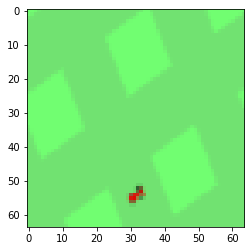

In [20]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [23]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 0.9329  1.4491  0.4262  0.741   0.6484  0.2052  0.1571  0.8059 -0.5025  3.3745  0.9709 -0.425
 -1.2528 -0.7225  1.5444  0.169   0.404   1.9421 -0.0359 -1.1435 -0.3713 -0.2576 -0.4979 -0.9327
  0.474   0.4518 -0.3517  1.4257 -1.753  -0.5938 -1.2451  0.5998]


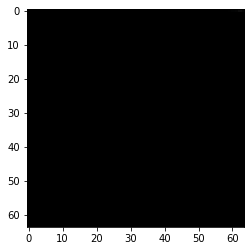

In [24]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()